In [1]:
import pandas as pd
import numpy as np

In [2]:
iris=pd.read_csv('iris.csv')
iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
iris['Target']=pd.factorize(iris.Species)[0]

In [4]:
iris.tail(5)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Target
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2
149,5.9,3.0,5.1,1.8,virginica,2


In [6]:
from matplotlib import pyplot as plt
%matplotlib inline

In [7]:
iris0=iris[iris.Target==0]
iris1=iris[iris.Target==1]
iris2=iris[iris.Target==2]

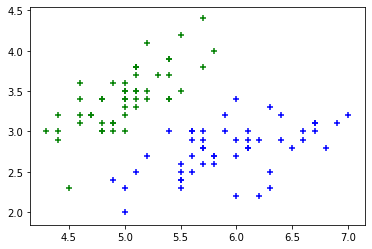

In [11]:
plt.scatter(iris0['Sepal.Length'],iris0['Sepal.Width'],color='green',marker='+')
plt.scatter(iris1['Sepal.Length'],iris1['Sepal.Width'],color='Blue',marker='+')

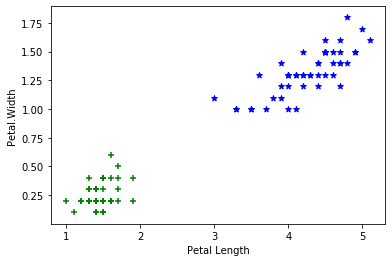

In [13]:
plt.xlabel('Petal Length')
plt.ylabel('Petal.Width')
plt.scatter(iris0['Petal.Length'],iris0['Petal.Width'],color='green',marker='+')
plt.scatter(iris1['Petal.Length'],iris1['Petal.Width'],color='blue',marker='*')

In [22]:
X=iris.iloc[:,0:4].values
y=iris.iloc[:,5:6].values

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [29]:
from sklearn.svm import SVC

In [30]:
model=SVC()

In [32]:
model.fit(X_train,y_train)

C:\Users\shahi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shahi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [33]:
model.score(X_test,y_test)

0.9666666666666667

In [37]:
y_pred=model.predict(X_test)
y_pred

array([0, 1, 2, 2, 0, 2, 1, 2, 1, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 0,
       2, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [38]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.90      0.95        10
           2       0.92      1.00      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

